# pySand
#### Sand transport examples - created with version 1.6

The stokes model should be used for vertical or deviated sand transport (typically in wells) which estimates critical (mix) velocity for sand transport. The hydro model should be used for horisontal sand transport (typically for subsea flowlines) and estimates two critical velocities, one for transition from stationary beds to moving beds and one for the transition from moving beds to fully dispersed flow.

In [1]:
from pysand.transport import stokes, hydro
import matplotlib.pyplot as plt

### Deviated well using stokes model

In [2]:
help(stokes)

Help on function stokes in module pysand.transport:

stokes(rho_m, mu_m, d_p, angle, rho_p=2650)
    Sand lifting rate calculation model for vertical or deviated (up to ~80 deg) inclination
    Based on Stokes law for settling velocities, but corrected for turbulent flow around sand grains
    Mixture fluid properties and inclination at point of interest (e.g. down hole in a well)
    :param rho_m: Mixture density [kg/m3]
    :param mu_m: Mixture viscosity [kg/ms]
    :param d_p: Particle diameter [mm]
    :param angle: Inclination from vertical [deg]
    :param rho_p: Particle density [kg/m3], default = 2650 (quartz sand)
    :return: Particle settling velocity at point of interest [m/s]



Input parameters:

In [3]:
rho_m = 350  # Mix density [kg/m3]
mu_m = 1e-4  # Mix viscosity [kg/ms]
d_p = .4  # Particle diameter [mm]
angle = 24  # Angle from vertical [deg]

Critical velocity for transport [m/s]:

In [4]:
stokes(rho_m, mu_m, d_p, angle)

0.24

### Horisontal flowline using hydro model

In [5]:
help(hydro)

Help on function hydro in module pysand.transport:

hydro(D, rho_l, mu_l, d_p, e=5e-05, rho_p=2650)
    Equinor sand transport model for horizontal pipelines
    Based on T. Søntvedt (1995) and R. Schulkes (2002) work in Hydro
    :param D: Pipe diameter [m]
    :param rho_l: Liquid density [kg/m3]
    :param mu_l: Dynamic liquid viscosity [Pa.s]
    :param d_p: Sand grain diameter [mm]
    :param e: Roughness of pipe [m] Optional. Default value: 5e-5 m
    :param rho_p: Particle density [kg/m3], default = 2650 (quartz sand)
    :return: list of critical velocities for transitions from stationary to moving bed
    and from moving bed to dispersed transport [m/s]



Input parameters:

In [6]:
D, rho_l, mu_l, d_p = 0.12, 780, 1.2e-3, .7

Critical velocities [m/s] for moving dunes and dispersed flow:

In [7]:
hydro(D, rho_l, mu_l, d_p)

[0.78, 1.44]

### Sensitivity study for varying inclination with Stokes model:

In [8]:
angles = list(range(0, 81, 10))
print('Inclination [deg] in study: ', angles)
velocities = []
for angle in angles:
    velocities.append(stokes(rho_m, mu_m, d_p, angle))

Inclination [deg] in study:  [0, 10, 20, 30, 40, 50, 60, 70, 80]


Text(0, 0.5, 'Critical velocity [m/s]')

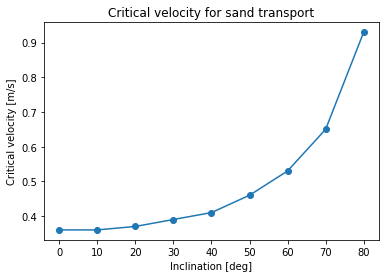

In [9]:
plt.plot(angles, velocities, 'o-')
plt.title('Critical velocity for sand transport')
plt.xlabel('Inclination [deg]')
plt.ylabel('Critical velocity [m/s]')